# **IMPORT MODULES**

In [117]:
#step 1: import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
import xgboost as xgb
warnings.filterwarnings('ignore')

# **LOAD THE DATASET**

In [118]:
df = pd.read_csv("/content/drive/MyDrive/climate_data.csv", delimiter=',', quoting = 3)

The delimiter parameter specifies the character used to separate fields in the CSV file.
If not specified, the default delimiter is a comma (,), which is why CSV files are often referred to as comma-separated values files.
The quoting parameter controls the handling of quotes inside fields. It tells pandas how to deal with quotes (such as double quotes) surrounding certain fields in the CSV file.
In this case, quoting=3 indicates that pandas should ignore quotes. The value 3 corresponds to csv.QUOTE_NONE, meaning quotes are not recognized and should be ignored.
If not specified, the default behavior is quoting=0, which means quotes are recognized, and fields surrounded by quotes are parsed accordingly.

In [119]:
df.head()

,Date,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),...,Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Date1,Month,diff_pressure
0,2009-01-01,37.8,35.0,12.7,29.7,26.4,36.8,274.0,0.0,0.0,...,4.0,27.0,29.762,29.596,41.4,59.0,40.0,2009-01-01,1,0.166
1,2009-01-02,43.2,32.0,14.7,29.5,12.8,18.0,240.0,0.0,0.0,...,4.0,16.0,29.669,29.268,35.7,51.0,52.0,2009-01-02,1,0.401
2,2009-01-03,25.7,60.0,12.7,29.7,8.3,12.2,290.0,0.0,0.0,...,8.0,35.0,30.232,29.260,25.3,38.0,41.0,2009-01-03,1,0.972
3,2009-01-04,9.3,67.0,0.1,30.4,2.9,4.5,47.0,0.0,0.0,...,7.0,35.0,30.566,30.227,12.7,20.0,32.0,2009-01-04,1,0.339
4,2009-01-05,23.5,30.0,-5.3,29.9,16.7,23.1,265.0,0.0,0.0,...,5.0,13.0,30.233,29.568,38.0,53.0,32.0,2009-01-05,1,0.665


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3902 entries, 0 to 3901
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      3902 non-null   object 
 1   Average temperature (°F)  3902 non-null   float64
 2   Average humidity (%)      3902 non-null   float64
 3   Average dewpoint (°F)     3902 non-null   float64
 4   Average barometer (in)    3902 non-null   float64
 5   Average windspeed (mph)   3902 non-null   float64
 6   Average gustspeed (mph)   3902 non-null   float64
 7   Average direction (°deg)  3902 non-null   float64
 8   Rainfall for month (in)   3902 non-null   float64
 9   Rainfall for year (in)    3902 non-null   float64
 10  Maximum rain per minute   3902 non-null   float64
 11  Maximum temperature (°F)  3902 non-null   float64
 12  Minimum temperature (°F)  3902 non-null   float64
 13  Maximum humidity (%)      3902 non-null   float64
 14  Minimum 

**Our Dataset has total of 22 columns, 3902 entries (rows).**

In [121]:
df.describe()

,Average temperature (°F),Average humidity (%),Average dewpoint (°F),Average barometer (in),Average windspeed (mph),Average gustspeed (mph),Average direction (°deg),Rainfall for month (in),Rainfall for year (in),Maximum rain per minute,...,Minimum temperature (°F),Maximum humidity (%),Minimum humidity (%),Maximum pressure,Minimum pressure,Maximum windspeed (mph),Maximum gust speed (mph),Maximum heat index (°F),Month,diff_pressure
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.0,...,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,44.670733,48.878011,23.127037,29.881420,5.758893,10.011968,216.037417,0.451105,5.486171,0.0,...,31.227524,73.673757,26.016914,30.045451,29.701622,19.840748,33.974910,58.086315,6.395695,0.343829
std,15.326793,17.438153,14.634088,0.250395,4.022485,14.117446,97.677761,0.603462,4.534444,0.0,...,14.124424,20.380611,15.623870,0.258140,0.451691,12.235410,38.632424,17.953453,3.430231,0.407499
min,-12.100000,9.000000,-22.200000,28.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-27.700000,1.000000,0.000000,29.338000,13.266000,0.000000,0.000000,-6.100000,1.000000,0.000000
25%,33.700000,36.000000,12.100000,29.700000,2.700000,4.500000,116.000000,0.050000,0.980000,0.0,...,23.000000,63.000000,15.000000,29.866000,29.562000,13.800000,19.600000,43.900000,3.000000,0.220000
50%,45.100000,47.000000,22.500000,29.900000,4.600000,7.100000,253.000000,0.220000,5.080000,0.0,...,32.800000,81.000000,22.000000,30.016000,29.711000,18.400000,27.600000,57.200000,6.000000,0.293000
75%,58.000000,61.000000,35.400000,30.000000,8.000000,12.100000,282.000000,0.670000,9.047500,0.0,...,41.800000,89.000000,32.000000,30.203000,29.869000,24.200000,34.500000,77.300000,9.000000,0.395000
max,76.300000,94.000000,55.100000,31.000000,26.400000,240.400000,360.000000,4.480000,16.410000,0.0,...,65.700000,100.000000,90.000000,31.204000,30.855000,181.700000,255.300000,88.400000,12.000000,16.602000


In [122]:
df.isnull().sum()

Date                        0
Average temperature (°F)    0
Average humidity (%)        0
Average dewpoint (°F)       0
Average barometer (in)      0
Average windspeed (mph)     0
Average gustspeed (mph)     0
Average direction (°deg)    0
Rainfall for month (in)     0
Rainfall for year (in)      0
Maximum rain per minute     0
Maximum temperature (°F)    0
Minimum temperature (°F)    0
Maximum humidity (%)        0
Minimum humidity (%)        0
Maximum pressure            0
Minimum pressure            0
Maximum windspeed (mph)     0
Maximum gust speed (mph)    0
Maximum heat index (°F)     0
Date1                       0
Month                       0
diff_pressure               0
dtype: int64

# **Hence here there are no missing values.**

# **EDA - EXPLORATORY DATA ANALYSIS**

# **What is KDE?**
KDE Plot (Kernel Density Estimate Plot):

A KDE plot is a smoothed representation of the distribution of a continuous variable.
It provides a non-parametric estimate of the probability density function (PDF) of the data.

It is created by placing a kernel (a smooth, symmetric function) at each data point and summing up the contributions from all kernels to generate a smooth curve.


# **What is Box Plot (Box-and-Whisker Plot)?**
A box plot is a graphical representation of the distribution of a continuous variable through five summary statistics: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.

It consists of a box (or rectangle) that represents the interquartile range (IQR) of the data (Q1 to Q3), with a line inside the box indicating the median.


# **Let's plot a distribution graph, kde plot, box plot for:**

Average temperature (°F)    

Average humidity (%)        

Average dewpoint (°F)       

Average barometer (in)      

Average windspeed (mph)     

Rainfall for month (in)     

Rainfall for year (in)

Text(0.5, 0, 'value')

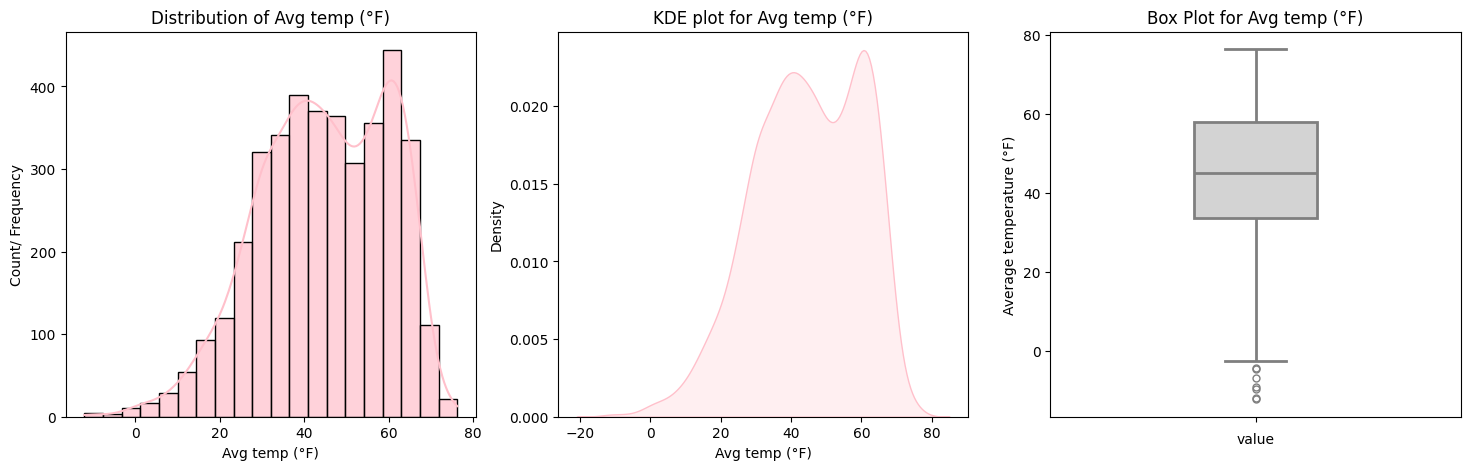

In [123]:
# Set figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5)) #it creates a 1x3 grid of subplots, resulting in a 1-dimensional array of axes.
#Therefore, you should use single indices to access each subplot, not two indices as if accessing elements of a 2D array.
# Plot distribution curve for Average temperature (°F)
sns.histplot(df['Average temperature (°F)'], bins=20, alpha=0.7, kde=True, color='pink', ax=axes[0])
axes[0].set_title('Distribution of Avg temp (°F)')
axes[0].set_xlabel('Avg temp (°F)')
axes[0].set_ylabel('Count/ Frequency')

# Plot KDE curve for Average temperature (°F)
sns.kdeplot(df['Average temperature (°F)'], fill='True', color='pink', ax=axes[1])
axes[1].set_title('KDE plot for Avg temp (°F)')
axes[1].set_xlabel('Avg temp (°F)')
axes[1].set_ylabel('Density')

# Box plot for Average temperature (°F)
sns.boxplot(df['Average temperature (°F)'], color='lightgray', width=0.3, linewidth=2, fliersize=5, ax=axes[2])
axes[2].set_title('Box Plot for Avg temp (°F)')
axes[2].set_xlabel('Avg temp (°F)')
axes[2].set_xlabel('value')

Text(0, 0.5, 'value')

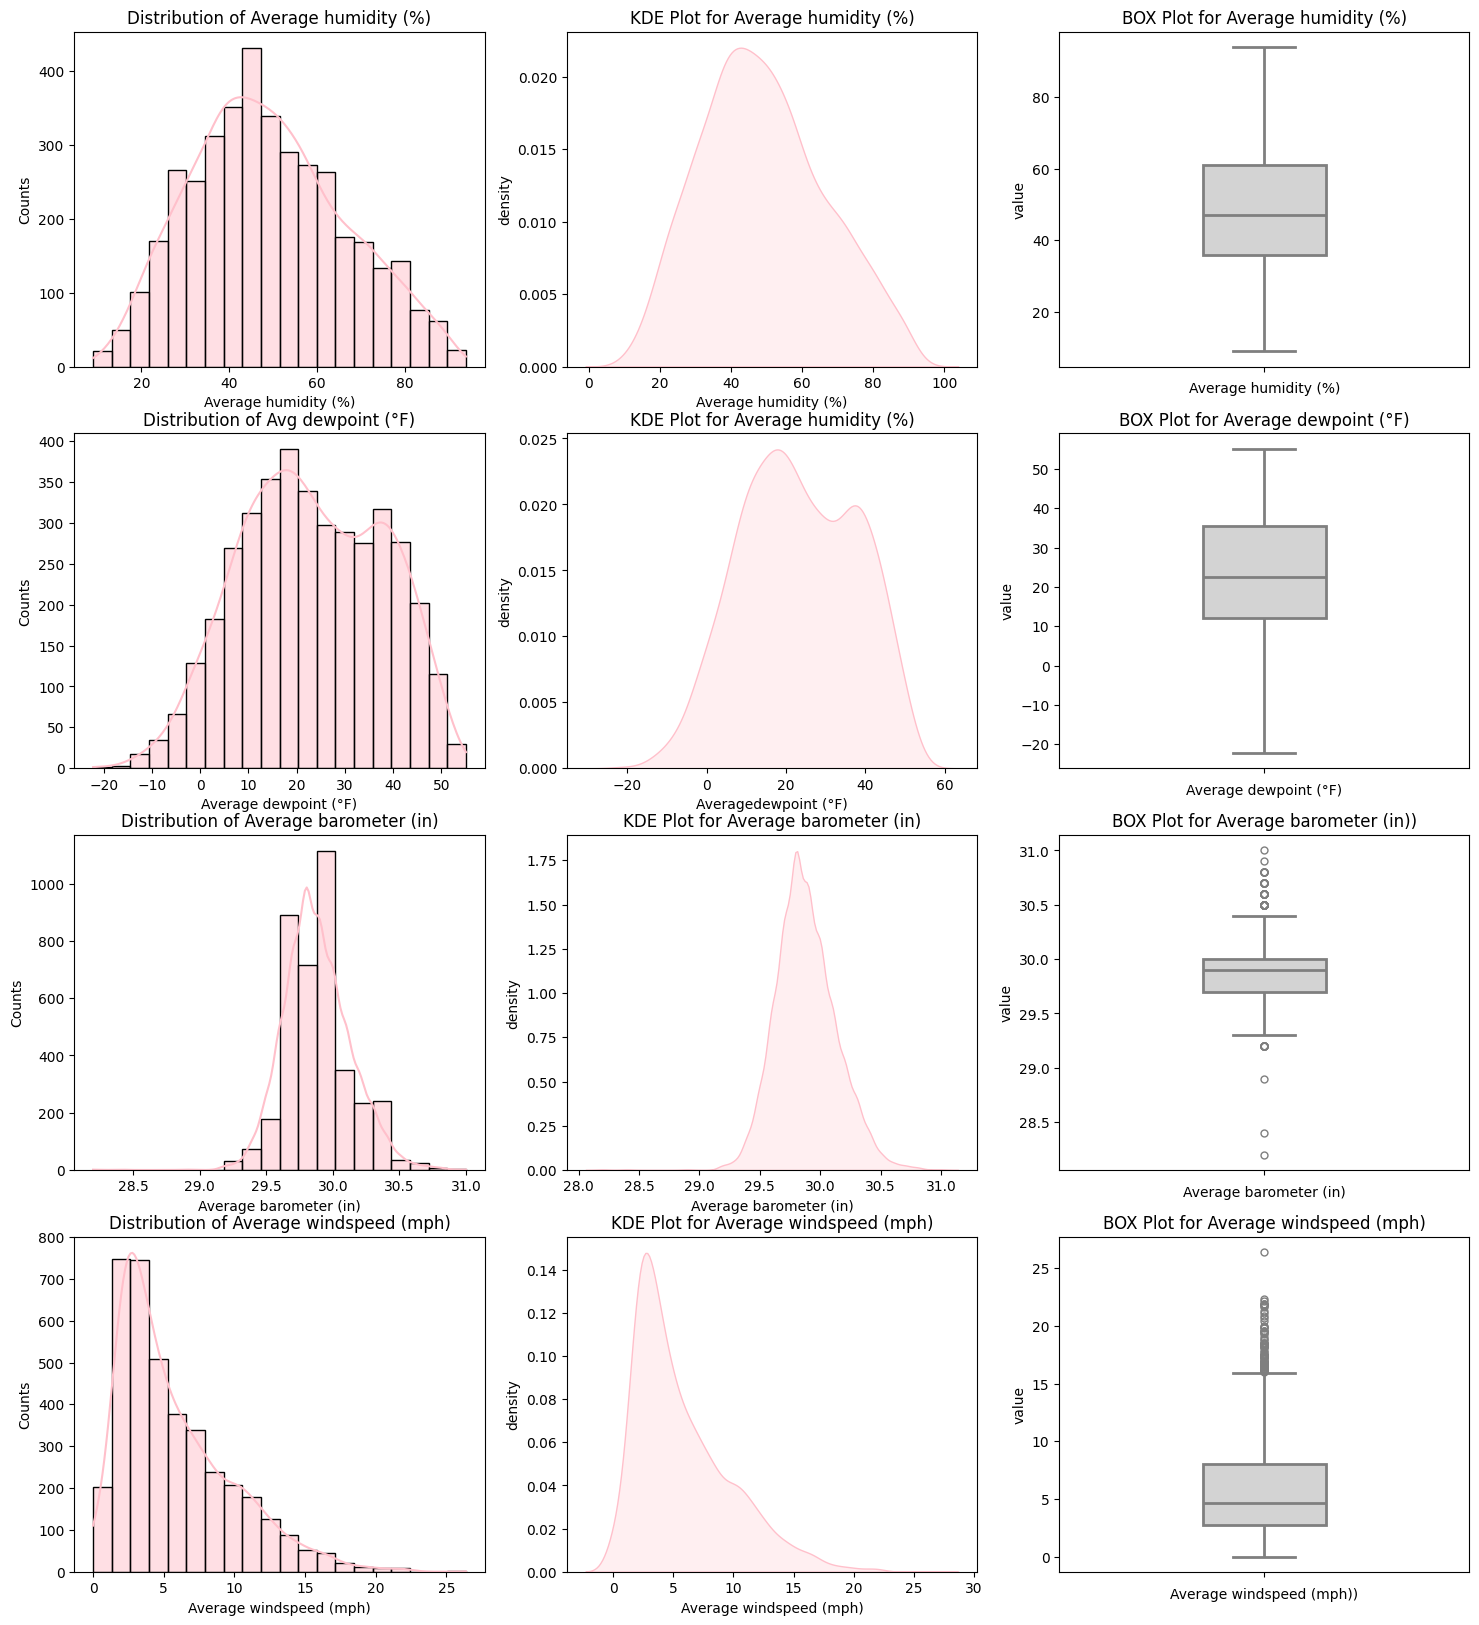

In [124]:
##set figure and axes
fig, axes= plt.subplots(nrows=4, ncols=3, figsize=(18,20))
#let's plot distribution curve for Average humidity (%)
sns.histplot(df['Average humidity (%)'], bins=20, color='pink', kde= True, ax=axes[0, 0])
axes[0,0].set_title('Distribution of Average humidity (%)')
axes[0,0].set_xlabel('Average humidity (%)')
axes[0,0].set_ylabel('Counts')

#let's plot kde curve for Average humidity (%)
sns.kdeplot(df['Average humidity (%)'], fill=True, color='pink', ax=axes[0,1])
axes[0,1].set_title('KDE Plot for Average humidity (%)')
axes[0,1].set_xlabel('Average humidity (%)')
axes[0,1].set_ylabel('density')


#box plot for Average humidity (%)
sns.boxplot(df['Average humidity (%)'], color='lightgray', width=0.3, linewidth=2, fliersize=5, ax=axes[0, 2])
axes[0,2].set_title('BOX Plot for Average humidity (%)')
axes[0,2].set_xlabel('Average humidity (%)')
axes[0,2].set_ylabel('value')

#let's plot distribution curve for dewpoint (°F)
sns.histplot(df['Average dewpoint (°F)'], bins=20, color='pink', kde= True, ax=axes[1, 0])
axes[1,0].set_title('Distribution of Avg dewpoint (°F)')
axes[1,0].set_xlabel('Average dewpoint (°F)')
axes[1,0].set_ylabel('Counts')

#let's plot kde curve for Average dewpoint (°F)
sns.kdeplot(df['Average dewpoint (°F)'], fill=True, color='pink', ax=axes[1,1])
axes[1,1].set_title('KDE Plot for Average humidity (%)')
axes[1,1].set_xlabel('Averagedewpoint (°F)')
axes[1,1].set_ylabel('density')


#box plot for Average dewpoint (°F)
sns.boxplot(df['Average dewpoint (°F)'], color='lightgray', width=0.3, linewidth=2, fliersize=5, ax=axes[1,2])
axes[1,2].set_title('BOX Plot for Average dewpoint (°F)')
axes[1,2].set_xlabel('Average dewpoint (°F)')
axes[1,2].set_ylabel('value')

#let's plot distribution curve for Average barometer (in)
sns.histplot(df['Average barometer (in)'], bins=20, color='pink', kde= True, ax=axes[2, 0])
axes[2,0].set_title('Distribution of Average barometer (in)')
axes[2,0].set_xlabel('Average barometer (in)')
axes[2,0].set_ylabel('Counts')

#let's plot kde curve for Average barometer (in)
sns.kdeplot(df['Average barometer (in)'], fill=True, color='pink', ax=axes[2,1])
axes[2,1].set_title('KDE Plot for Average barometer (in)')
axes[2,1].set_xlabel('Average barometer (in)')
axes[2,1].set_ylabel('density')


#box plot for Average barometer (in)
sns.boxplot(df['Average barometer (in)'], color='lightgray', width=0.3, linewidth=2, fliersize=5, ax=axes[2,2])
axes[2,2].set_title('BOX Plot for Average barometer (in))')
axes[2,2].set_xlabel('Average barometer (in)')
axes[2,2].set_ylabel('value')

#let's plot distribution curve for Average windspeed (mph)
sns.histplot(df['Average windspeed (mph)'], bins=20, color='pink', kde= True, ax=axes[3, 0])
axes[3,0].set_title('Distribution of Average windspeed (mph)')
axes[3,0].set_xlabel('Average windspeed (mph)')
axes[3,0].set_ylabel('Counts')

#let's plot kde curve for Average windspeed (mph)
sns.kdeplot(df['Average windspeed (mph)'], fill=True, color='pink', ax=axes[3,1])
axes[3,1].set_title('KDE Plot for Average windspeed (mph)')
axes[3,1].set_xlabel('Average windspeed (mph)')
axes[3,1].set_ylabel('density')


#box plot for Average windspeed (mph)
sns.boxplot(df['Average windspeed (mph)'],  color='lightgray', width=0.3, linewidth=2, fliersize=5, ax=axes[3,2])
axes[3,2].set_title('BOX Plot for Average windspeed (mph)')
axes[3,2].set_xlabel('Average windspeed (mph))')
axes[3,2].set_ylabel('value')

Text(0, 0.5, 'value')

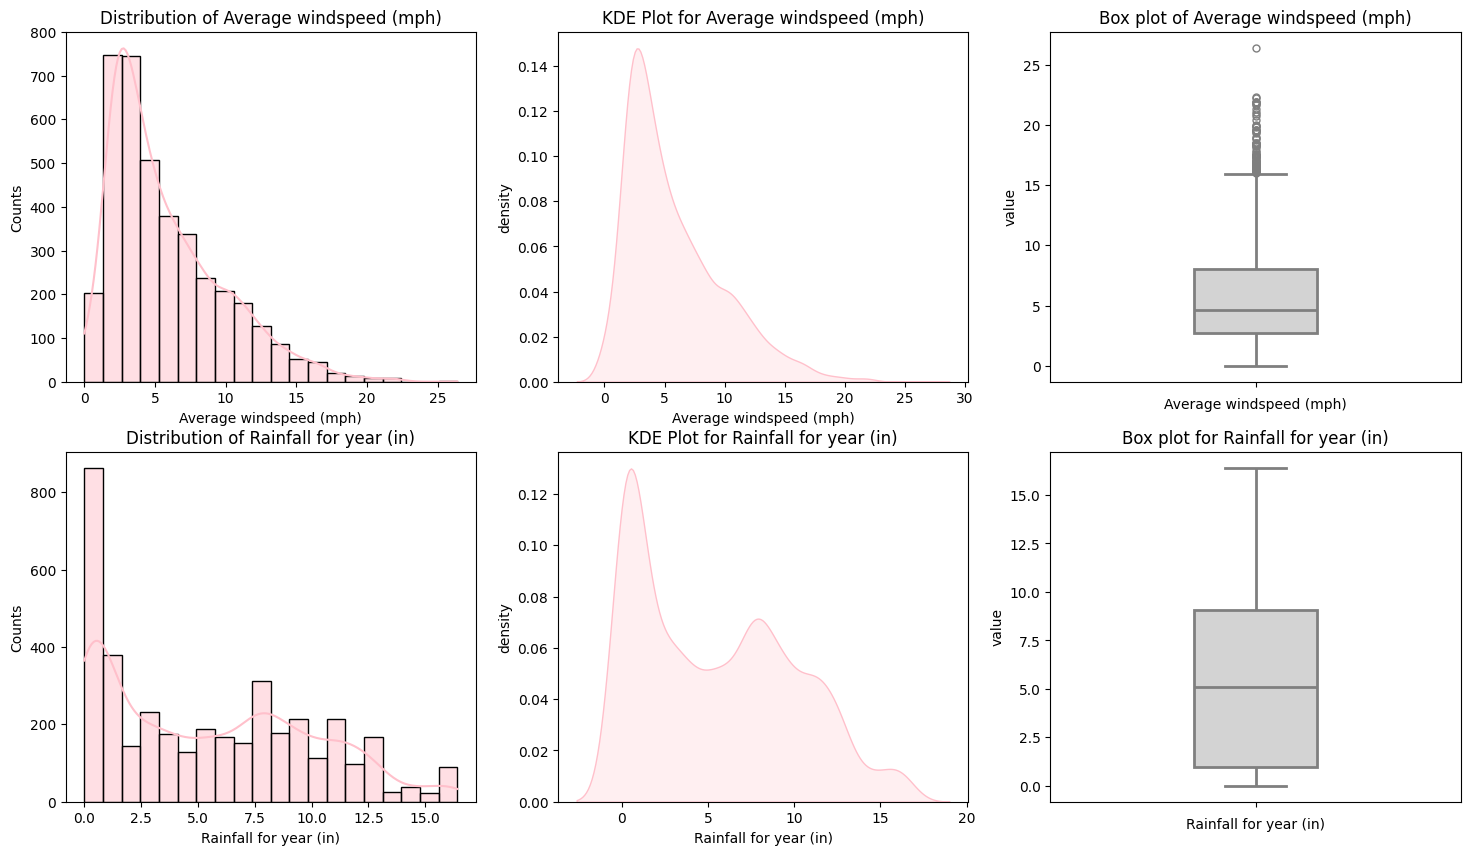

In [125]:
##set figure and axes
fig, axes= plt.subplots(nrows=2, ncols=3, figsize=(18,10))
#let's plot distribution curve for Average windspeed (mph)
sns.histplot(df['Average windspeed (mph)'], bins=20, color='pink', kde= True, ax=axes[0, 0])
axes[0,0].set_title('Distribution of Average windspeed (mph)')
axes[0,0].set_xlabel('Average windspeed (mph)')
axes[0,0].set_ylabel('Counts')

#let's plot kde curve for Average windspeed (mph)
sns.kdeplot(df['Average windspeed (mph)'], fill=True, color='pink', ax=axes[0,1])
axes[0,1].set_title('KDE Plot for Average windspeed (mph)')
axes[0,1].set_xlabel('Average windspeed (mph)')
axes[0,1].set_ylabel('density')

#box plot for Average windspeed (mph)
sns.boxplot(df['Average windspeed (mph)'],  color='lightgray', width=0.3, linewidth=2, fliersize=5, ax=axes[0, 2])
axes[0,2].set_title('Box plot of Average windspeed (mph)')
axes[0,2].set_xlabel('Average windspeed (mph)')
axes[0,2].set_ylabel('value')

#let's plot distribution curve for Rainfall for year (in)
sns.histplot(df['Rainfall for year (in)'], bins=20, color='pink', kde= True, ax=axes[1, 0])
axes[1,0].set_title('Distribution of Rainfall for year (in)')
axes[1,0].set_xlabel('Rainfall for year (in)')
axes[1,0].set_ylabel('Counts')

#let's plot kde curve for Rainfall for year (in)
sns.kdeplot(df['Rainfall for year (in)'], fill=True, color='pink', ax=axes[1,1])
axes[1,1].set_title('KDE Plot for Rainfall for year (in)')
axes[1,1].set_xlabel('Rainfall for year (in)')
axes[1,1].set_ylabel('density')

#box plot for Rainfall for year (in)
sns.boxplot(df['Rainfall for year (in)'],  color='lightgray', width=0.3, linewidth=2, fliersize=5, ax=axes[1, 2])
axes[1,2].set_title('Box plot for Rainfall for year (in)')
axes[1,2].set_xlabel('Rainfall for year (in)')
axes[1,2].set_ylabel('value')

In the context of **sns.histplot**, kde, alpha and bins are parameters used to customize the appearance of the histogram:

**kde:** This parameter stands for Kernel Density Estimation. When set to True, it overlays a kernel density estimate (KDE) plot on top of the histogram bars. KDE is a non-parametric way to estimate the probability density function of a continuous random variable. It provides a smooth, continuous representation of the distribution.

**alpha** is a parameter used to control the transparency of the histogram bars plotted by sns.histplot(). It takes a value between 0 and 1, where:

alpha=0 makes the histogram bars fully transparent (invisible).
alpha=1 makes the histogram bars fully opaque (completely solid).
By default, alpha is set to 1, resulting in solid histogram bars.

**bins:** This parameter determines the number of bins or intervals into which the data is divided in the histogram. Each bin represents a range of values, and the height of each bar in the histogram corresponds to the frequency or count of data points falling within that bin. Specifying the bins parameter allows you to control the granularity of the histogram. Increasing the number of bins can provide more detailed insight into the distribution of the data, while decreasing it can result in a more generalized view.

In a **KDE plot** created with sns.kdeplot, there are **no bins** because KDE plots do not use bins like histograms. Instead, KDE plots estimate the probability density function (PDF) of the data using a kernel smoothing technique. The smoothness of the resulting curve is controlled by parameters such as bandwidth.

The **fill** parameter in **sns.kdeplot** determines whether the area under the KDE curve is filled with color. When fill=True, the area under the curve is filled with the specified color

# **Regression Plot**
Regression plots can help visualize the linear relationship between each feature and the target variable, while correlation plots can provide a numerical measure of the strength and direction of the linear relationship.

Let our model predicts rainfall for given month, hence our target variable is 'Rainfall for month (in)'. Let's plot regression plot for various X_features and target variable (y).

<Figure size 600x400 with 0 Axes>

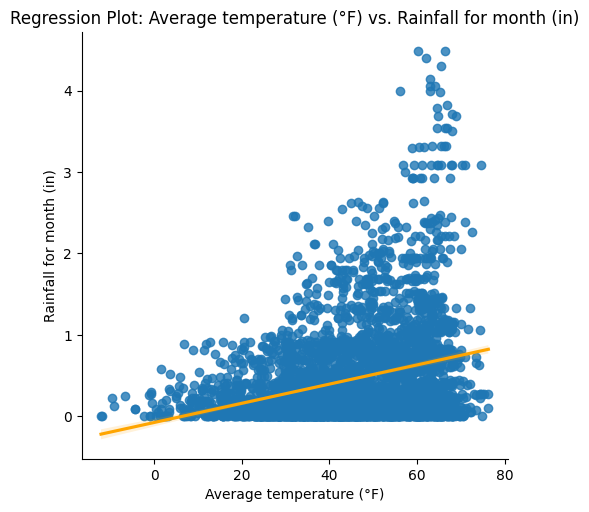

<Figure size 600x400 with 0 Axes>

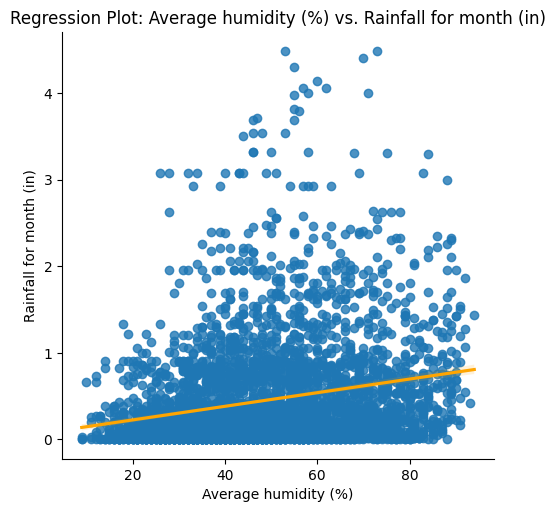

<Figure size 600x400 with 0 Axes>

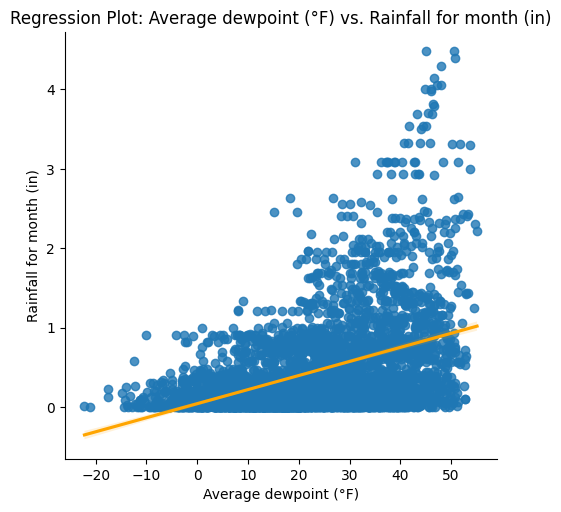

<Figure size 600x400 with 0 Axes>

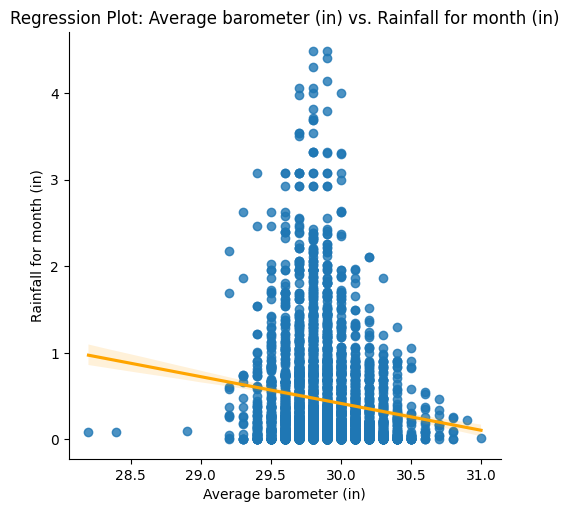

<Figure size 600x400 with 0 Axes>

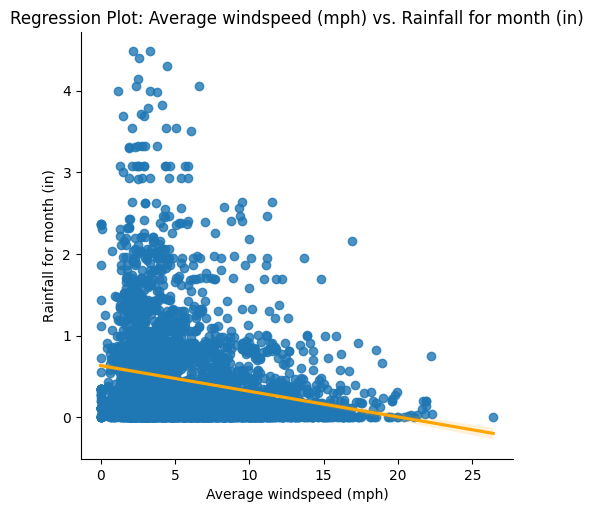

<Figure size 600x400 with 0 Axes>

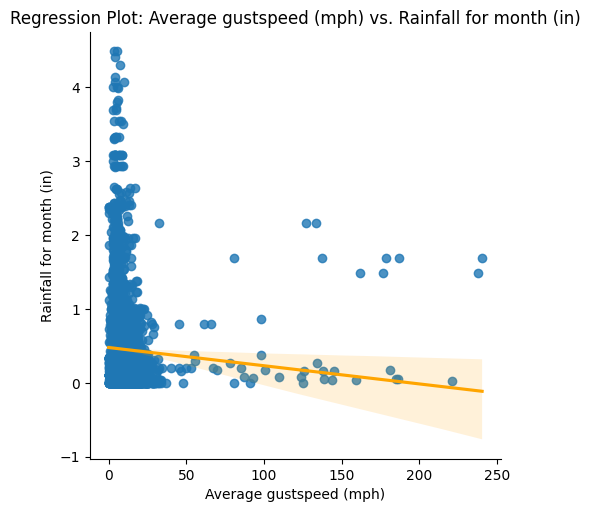

In [126]:
# Define the target variable
target_variable = 'Rainfall for month (in)'

# List of features (X)
features = ['Average temperature (°F)', 'Average humidity (%)', 'Average dewpoint (°F)',
            'Average barometer (in)', 'Average windspeed (mph)', 'Average gustspeed (mph)'
            ]

# Plot EDA for each feature
for feature in features:
    plt.figure(figsize=(6, 4))
                # Scatter plot with regression line
    sns.lmplot(x=feature, y=target_variable, data=df, scatter='True', line_kws={'color': 'orange'})
    plt.title(f'Regression Plot: {feature} vs. {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)

<Figure size 600x400 with 0 Axes>

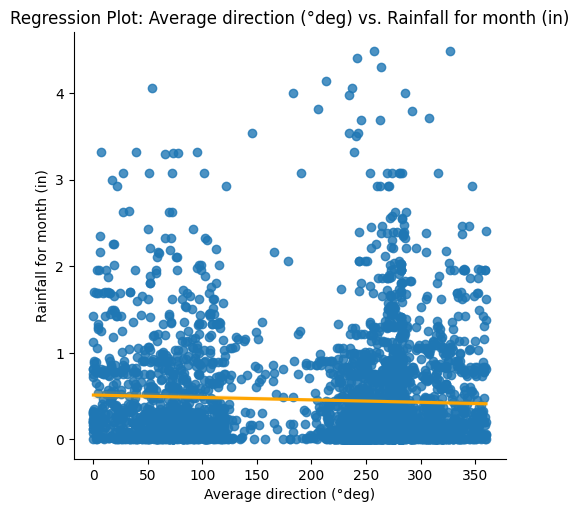

<Figure size 600x400 with 0 Axes>

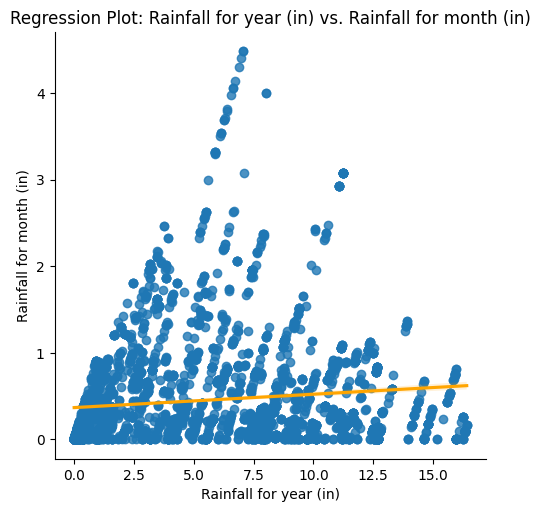

<Figure size 600x400 with 0 Axes>

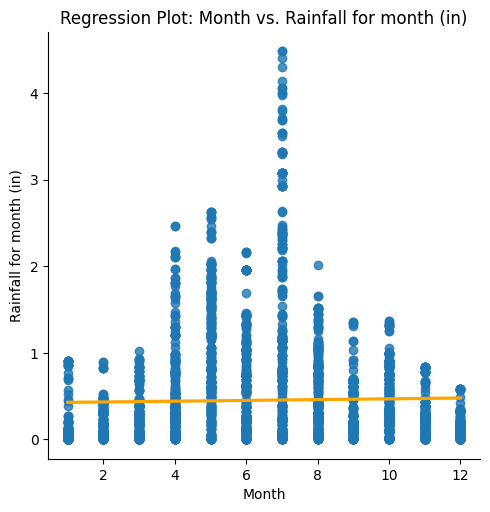

<Figure size 600x400 with 0 Axes>

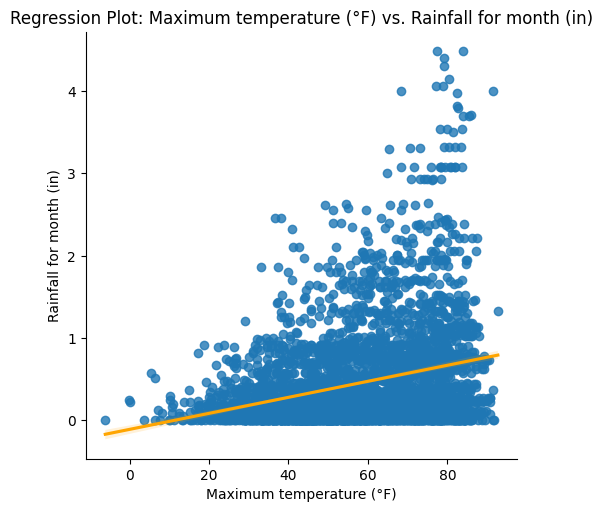

<Figure size 600x400 with 0 Axes>

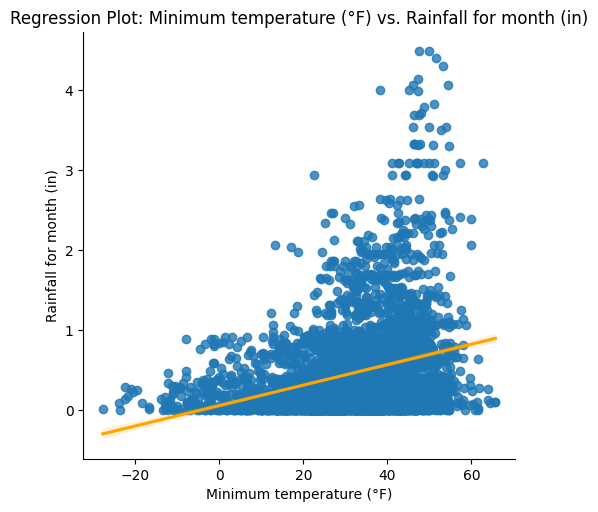

<Figure size 600x400 with 0 Axes>

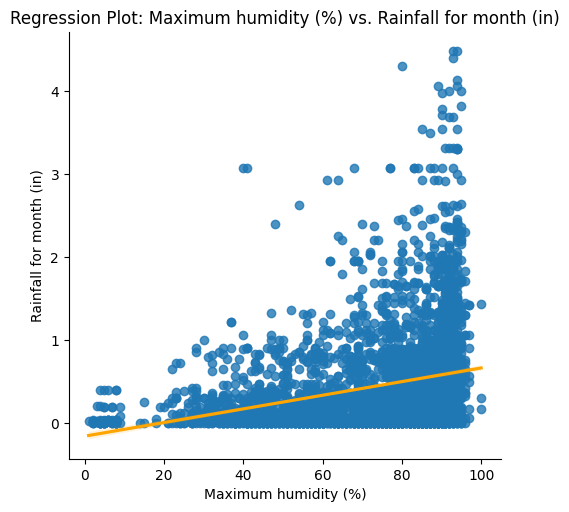

In [127]:

# Define the target variable
target_variable = 'Rainfall for month (in)'

# List of features (X)
features = ['Average direction (°deg)', 'Rainfall for year (in)', 'Month',
            'Maximum temperature (°F)', 'Minimum temperature (°F)', 'Maximum humidity (%)'
            ]

# Plot EDA for each feature
for feature in features:
    plt.figure(figsize=(6, 4))
                # Scatter plot with regression line
    sns.lmplot(x=feature, y=target_variable, data=df, scatter='True', line_kws={'color': 'orange'})
    plt.title(f'Regression Plot: {feature} vs. {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)

# **MODEL DEVELOPMENT**

# **LINEAR REGRESSION MODEL**

In [128]:
y = df['Rainfall for month (in)']
X = df.drop(columns =['diff_pressure', 'Date','Rainfall for month (in)', 'Date1'] )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Mean Absolute Error: 0.3727379294273934
Mean Squared Error: 0.28154142563986356
R-squared: 0.23102098346877065


In [129]:
y_train_pred = model.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)


Mean Absolute Error: 0.3678941425838272
Mean Squared Error: 0.2749868450736384
R-squared: 0.24361375324557688


In [130]:
results = pd.DataFrame(columns=['Model', 'MSE_train', 'R2_train', 'MSE_test', 'R2_test'])
results.loc[len(results)] = ['Linear Regression', mse_train, r2_train, mse_test, r2_test]

# **Random Forest Regression Model**

In [131]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Mean Absolute Error: 0.18020870678617157
Mean Squared Error: 0.0975405723431498
R-squared: 0.7335857299796653


In [132]:
y_train_pred = model.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

Mean Absolute Error: 0.06772476770265938
Mean Squared Error: 0.014595787093880165
R-squared: 0.959852433612196


In [133]:
results.loc[len(results)] = ['Random Forest Regression', mse_train, r2_train, mse_test, r2_test]

# **Nueral Network Model**

In [134]:
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Mean Absolute Error: 0.4441304744821748
Mean Squared Error: 0.4056450293467778
R-squared: -0.10794535837464436


In [135]:
y_train_pred = model.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

Mean Absolute Error: 0.4107945182423746
Mean Squared Error: 0.3358244241263413
R-squared: 0.07627226435007461


In [136]:
results.loc[len(results)] = ['Neural Network Regression', mse_train, r2_train, mse_test, r2_test]

# **Decision Tree Algorithm**

In [137]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Mean Absolute Error: 0.1798847631241997
Mean Squared Error: 0.1440695262483995
R-squared: 0.6065003849617217


In [138]:
y_train_pred = model.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

Mean Absolute Error: 3.8696394872638674e-18
Mean Squared Error: 3.5861073198502435e-34
R-squared: 1.0


In [139]:
results.loc[len(results)] = ['Decision Tree', mse_train, r2_train, mse_test, r2_test]

# **Ridge Regression Model**

In [140]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Mean Absolute Error: 0.1798847631241997
Mean Squared Error: 0.1440695262483995
R-squared: 0.6065003849617217


In [141]:
y_train_pred = model.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

Mean Absolute Error: 3.8696394872638674e-18
Mean Squared Error: 3.5861073198502435e-34
R-squared: 1.0


In [142]:
results.loc[len(results)] = ['Riddge Regression', mse_train, r2_train, mse_test, r2_test]

# **Elastic Net Regressor Model**

In [143]:
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Mean Absolute Error: 0.3796433261154452
Mean Squared Error: 0.3027235126933655
R-squared: 0.1731659788865444


In [144]:
y_train_pred = model.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

Mean Absolute Error: 0.3702178479595717
Mean Squared Error: 0.29426252123422736
R-squared: 0.19059355753091545


In [145]:
results.loc[len(results)] = ['Elastic Net Regression', mse_train, r2_train, mse_test, r2_test]

# **XGBoost Algorithm**

In [146]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)

Mean Absolute Error: 0.19944581881848789
Mean Squared Error: 0.09662725805701533
R-squared: 0.7360802812519673


In [147]:
y_train_pred = model.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

Mean Absolute Error: 0.03679007089602461
Mean Squared Error: 0.0029424931399221845
R-squared: 0.9919062988572767


In [148]:
results.loc[len(results)] = ['XGBoost Regression', mse_train, r2_train, mse_test, r2_test]

# **HYPER PARAMETER TUNING FOR RANDOM FOREST REGRESSION**

In [149]:
model = RandomForestRegressor(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Select important features using feature importance
selector = SelectFromModel(best_model)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Fit the model on the selected features
best_model.fit(X_train_selected, y_train)

# Make predictions
y_pred = best_model.predict(X_test_selected)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_test)
print("R-squared:", r2_test)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Absolute Error: 0.14483073867670906
Mean Squared Error: 0.08293812522077527
R-squared: 0.7734696490213928


In [150]:
# Make predictions
y_pred = best_model.predict(X_train_selected)

# Evaluate the model
mae = mean_absolute_error(y_train, y_pred)
mse_train = mean_squared_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

Mean Absolute Error: 0.05338197114088332
Mean Squared Error: 0.012618674414564626
R-squared: 0.9652907331734626


Hence we got hiighest value of R-squared for testing data using Random Forest Regression model which is 0.773. Let's update this value to our results dataframe.

In [151]:
results.iloc[1] = ['Random Forest Regression', mse_train, r2_train, mse_test, r2_test]

# **HYPER PARAMETER TUNING FOR XGBOOST REGRESSION**

In [152]:
model = xgb.XGBRegressor()

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.3],
    'reg_lambda': [0, 0.1, 0.3]
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
print("Best Parameters:", grid_search.best_params_)
print("Test R-squared:", r2_test)
print("Mean Absolute Error:", mae)
print("Test R-squared:", r2_test)


Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'reg_alpha': 0.3, 'reg_lambda': 0.3}
Test R-squared: 0.7559052866869999
Mean Absolute Error: 0.18639396364142236
Test R-squared: 0.7559052866869999


In [153]:
# Make predictions
y_pred = best_model.predict(X_train)

# Evaluate the model
mae = mean_absolute_error(y_train, y_pred)
mse_train = mean_squared_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse_train)
print("R-squared:", r2_train)

Mean Absolute Error: 0.051683022595915507
Mean Squared Error: 0.005633692151221471
R-squared: 0.9845038141352138


Hence we got hiighest value of R-squared for testing data using XGBoost Regression model which is 0.755. Let's update this value to our results dataframe.

In [155]:
results.iloc[6] = ['XGBoost Regression', mse_train, r2_train, mse_test, r2_test]

# **Let's analyse the R square score and MSE value for all different algorithms after Hyper parameter Tuning, cross validation.**

In [156]:
results = results.sort_values(by='MSE_test', ascending=True)
results

,Model,MSE_train,R2_train,MSE_test,R2_test
1,Random Forest Regression,1.261867e-02,0.965291,0.082938,0.773470
6,XGBoost Regression,5.633692e-03,0.984504,0.089369,0.755905
3,Decision Tree,3.586107e-34,1.000000,0.144070,0.606500
4,Riddge Regression,3.586107e-34,1.000000,0.144070,0.606500
0,Linear Regression,2.749868e-01,0.243614,0.281541,0.231021
5,Elastic Net Regression,2.942625e-01,0.190594,0.302724,0.173166
2,Neural Network Regression,3.358244e-01,0.076272,0.405645,-0.107945
